<a href="https://colab.research.google.com/github/imymemineyay/Final-Project/blob/main/Arima_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google mount 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/final

/content/drive/MyDrive/Colab Notebooks/final


# 라이브러리

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm # 통계모델
import matplotlib.pyplot as plt

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
# 시간 정리 끝난 파일임

fanuc_chang = pd.read_csv('fanuc_chang.csv')

# 인덱스 설정

In [ ]:
fanuc_chang.drop(columns='Unnamed: 0', inplace = True) # 필요없는index drop

In [ ]:
fanuc_8 = fanuc_chang[['time', 'RW_WHEEL_REMAIN']][604800:691200]  # 하루만큼(len(fanuc_8) = 86400) 인덱스 슬라이싱해서 fanuc_8에 저장함.
fanuc_chang.set_index('time', inplace=True)
fanuc_8.set_index('time', inplace=True)

# 평가지표
https://velog.io/@euisuk-chung/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%8B%9C%EA%B3%84%EC%97%B4-AR-MA-ARMA-ARIMA%EC%9D%98-%EB%AA%A8%EB%93%A0-%EA%B2%83-%EC%8B%A4%EC%8A%B5%ED%8E%B8

## seasonal decomposition 함수

- 데이터의 추세, 계절, 예측오차(residual)을 분리해내서 시각화 해줌.
- 예측오차 그래프 : 평균과 분산을 알 수 있다.


In [ ]:
decompostion = sm.tsa.seasonal_decompose(data['customer'],  model='additive')
fig = decompostion.plot()
fig.set_size_inches(10,10)
plt.show()

# 모델 돌리기

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# 이런 식으로 모델을 구현할 건데 너무 오래 걸린다. 그래서 밑에 코드처럼 쪼개서 실행함.
# cast_df = pd.DataFrame()

# for i in range(0, 67):
#   if i == 66:
#     model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][24*60*60*i:5809440],
#                         order=(3, 1, 2))
#   else:
#     j = 24*60*60*i
#     model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
#                         order=(3, 1, 2))

#   model_ARIMA = model_ARIMA.fit()
#   cast = model_ARIMA.forecast(steps = len(fanuc_8))
#   cast = pd.DataFrame(cast)
#   cast.reset_index(inplace=True)
#   cast_df = pd.concat([cast_df,cast],  axis=0)

In [ ]:
len(fanuc_8)

86400

In [ ]:
# 모델을 돌리고 나면 결과값(cast)이 Series형태로 나온다.
# 미리 cast_df라는 dataframe을 만들어둔다.
# 그래서 결과값 cast를 dataframe 형태로 만들고
# cast와 cast_df를 concat해준다.
cast_df = pd.DataFrame()

for i in range(0, 10):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)

In [ ]:
# 위에 만들어둔 cast_df에 새로운 결과값 cast를 이어 붙인다.
for i in range(10, 20):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)
  print(cast_df)

In [ ]:
# cast_df에 새로운 결과값 cast를 이어 붙인다. (위와 동일) -> 이걸 반복하면 cast_df에 결과값이 누적되어서 저장됨.
for i in range(20, 30):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)
  print(cast_df)

In [ ]:
for i in range(30, 40):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)
  print(cast_df)



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-12 16:39:43        8.957772
86396  2022-12-12 16:39:44        8.957772
86397  2022-12-12 16:39:45        8.957772
86398  2022-12-12 16:39:46        8.957772
86399  2022-12-12 16:39:47        8.957772

[2678400 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-13 16:39:43        8.946092
86396  2022-12-13 16:39:44        8.946092
86397  2022-12-13 16:39:45        8.946092
86398  2022-12-13 16:39:46        8.946092
86399  2022-12-13 16:39:47        8.946092

[2764800 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-14 16:39:43        8.900762
86396  2022-12-14 16:39:44        8.900762
86397  2022-12-14 16:39:45        8.900762
86398  2022-12-14 16:39:46        8.900762
86399  2022-12-14 16:39:47        8.900762

[2851200 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-15 16:39:43        8.829541
86396  2022-12-15 16:39:44        8.829540
86397  2022-12-15 16:39:45        8.829540
86398  2022-12-15 16:39:46        8.829540
86399  2022-12-15 16:39:47        8.829540

[2937600 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-16 16:39:43        8.791763
86396  2022-12-16 16:39:44        8.791763
86397  2022-12-16 16:39:45        8.791763
86398  2022-12-16 16:39:46        8.791763
86399  2022-12-16 16:39:47        8.791762

[3024000 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-17 16:39:43        8.756349
86396  2022-12-17 16:39:44        8.756349
86397  2022-12-17 16:39:45        8.756349
86398  2022-12-17 16:39:46        8.756349
86399  2022-12-17 16:39:47        8.756348

[3110400 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-18 16:39:43        8.721508
86396  2022-12-18 16:39:44        8.721508
86397  2022-12-18 16:39:45        8.721508
86398  2022-12-18 16:39:46        8.721507
86399  2022-12-18 16:39:47        8.721507

[3196800 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-19 16:39:43        8.686698
86396  2022-12-19 16:39:44        8.686698
86397  2022-12-19 16:39:45        8.686697
86398  2022-12-19 16:39:46        8.686697
86399  2022-12-19 16:39:47        8.686697

[3283200 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-20 16:39:43        8.650765
86396  2022-12-20 16:39:44        8.650764
86397  2022-12-20 16:39:45        8.650764
86398  2022-12-20 16:39:46        8.650764
86399  2022-12-20 16:39:47        8.650764

[3369600 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invert

                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2022-12-21 16:39:43        8.641801
86396  2022-12-21 16:39:44        8.641801
86397  2022-12-21 16:39:45        8.641801
86398  2022-12-21 16:39:46        8.641801
86399  2022-12-21 16:39:47        8.641801

[3456000 rows x 2 columns]


In [ ]:
for i in range(44, 50):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))
  model_ARIMA.initialize_approximate_diffuse()
  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)
  print(cast_df)

In [ ]:
for i in range(50, 66):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df = pd.concat([cast_df,cast],  axis=0)
  print(cast_df)

In [ ]:
# 여기가 마지막
j = 24*60*60*66
model_ARIMA = ARIMA(fanuc_chang[['RW_WHEEL_REMAIN']][j:5809440],
                        order=(3, 1, 2))

model_ARIMA = model_ARIMA.fit()
cast = model_ARIMA.forecast(steps = len(fanuc_8))
cast = pd.DataFrame(cast)
cast.reset_index(inplace=True)
cast_df = pd.concat([cast_df,cast],  axis=0)
print(cast_df)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     index  predicted_mean
0      2022-11-11 16:39:48        9.957762
1      2022-11-11 16:39:49        9.957762
2      2022-11-11 16:39:50        9.957762
3      2022-11-11 16:39:51        9.957762
4      2022-11-11 16:39:52        9.957762
...                    ...             ...
86395  2023-01-11 22:23:43        7.960310
86396  2023-01-11 22:23:44        7.960310
86397  2023-01-11 22:23:45        7.960310
86398  2023-01-11 22:23:46        7.960310
86399  2023-01-11 22:23:47        7.960310

[5788800 rows x 2 columns]


In [ ]:
# cast_df를 csv 파일로 저장
cast_df.to_csv('cast_df.csv',index=False)

In [ ]:
cast_df = pd.read_csv('cast_df.csv')

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(fanuc_chang['RW_WHEEL_REMAIN'])
plt.plot(cast_df)
plt.xticks(rotation = 45)
plt.show()

## GW도 같은 방식으로 진행

In [ ]:
cast_df_GW = pd.DataFrame()

for i in range(0, 66):
  j = 24*60*60*i
  model_ARIMA = ARIMA(fanuc_chang[['GW_WHEEL_REMAIN']][j:604800+j],
                        order=(3, 1, 2))

  model_ARIMA.initialize_approximate_diffuse()
  model_ARIMA = model_ARIMA.fit()
  cast = model_ARIMA.forecast(steps = len(fanuc_8))
  cast = pd.DataFrame(cast)
  cast.reset_index(inplace=True)
  cast_df_GW = pd.concat([cast_df_GW,cast],  axis=0)

In [ ]:
cast_df_GW.to_csv('cast_df_GW.csv',index=False)

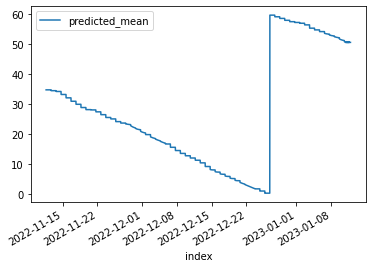

In [ ]:
plt.plot(cast_df_GW.set_index('index', inplace=True))
plt.plot(fanuc_chang['GW_WHEEL_REMAIN'])
plt.show()


In [ ]:
j = 24*60*60*66
model_ARIMA = ARIMA(fanuc_chang[['GW_WHEEL_REMAIN']][j:5809440],
                        order=(3, 1, 2))

model_ARIMA = model_ARIMA.fit()
cast = model_ARIMA.forecast(steps = len(fanuc_8)*2)
cast = pd.DataFrame(cast)
cast.reset_index(inplace=True)
cast_df_GW = pd.concat([cast_df_GW,cast],  axis=0)
print(cast)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invert

                     index  predicted_mean
0      2023-01-10 22:23:48         50.6495
1      2023-01-10 22:23:49         50.6495
2      2023-01-10 22:23:50         50.6495
3      2023-01-10 22:23:51         50.6495
4      2023-01-10 22:23:52         50.6495
...                    ...             ...
172795 2023-01-12 22:23:43         50.6495
172796 2023-01-12 22:23:44         50.6495
172797 2023-01-12 22:23:45         50.6495
172798 2023-01-12 22:23:46         50.6495
172799 2023-01-12 22:23:47         50.6495

[172800 rows x 2 columns]


# 이미 저장한 파일 불러오는 용도



In [ ]:
# 저장한 csv 파일을 불러온다.
dfdf = pd.read_csv('cast_df_GW.csv')
castdf = pd.read_csv('cast_df.csv')

In [ ]:
# 열 이름 바꾸기
castdf = castdf.rename(columns = {'index':'time', 'predicted_mean':'predicted_mean_rw'})
dfdf = dfdf.rename(columns = {'index':'time', 'predicted_mean':'predicted_mean_gw'})

In [ ]:
# dataframe을 csv로 저장
castdf.to_csv('arima_rw.csv') # rw를 arima로 예측한 값을 담은 csv
dfdf.to_csv('arima_gw.csv')  # gw를 arima로 예측한 값을 담은 csv

# 모델 평가

In [ ]:
from sklearn import metrics

def mae(y_true, y_pred):
    return metrics.mean_absolute_error(y_true,y_pred) #MAE
def mse(y_true, y_pred):
    return metrics.mean_squared_error(y_true,y_pred) # MSE
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true,y_pred))  # RMSE
def r2(y_true, y_pred):
    return metrics.r2_score(y_true,y_pred) # R2
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100 # MAPE

def get_score(model, y_true, y_pred):
    model = model
    mae_val = mae(y_true, y_pred)
    mse_val = mse(y_true, y_pred)
    rmse_val = rmse(y_true, y_pred)
    r2_val = r2(y_true, y_pred)
    mape_val = mape(y_true, y_pred)

    score_dict = {"model": model,
                  "mae" :  mae_val,
                  "mse" :  mse_val,
                  "rmse" : rmse_val,
                  "r2":    r2_val,
                  "mape" : mape_val
                 }
    return score_dict

In [ ]:
# gw 교체한 시기가 없어서 0으로 예측을 하여 mape 가 상대적으로 높게 나옴
get_score('arima', fanuc_chang_for_rmse, arima_gw_for_rmse)

{'model': 'arima',
 'mae': 0.2970031868313044,
 'mse': 0.1648845612401591,
 'rmse': 0.40605980007895276,
 'r2': 0.9984243869364873,
 'mape': 3.791772876941578}

In [ ]:
# rw
get_score('arima', y_test_rw, y_pred_rw)

{'model': 'arima',
 'mae': 0.011688940726788805,
 'mse': 0.00031410253746223885,
 'rmse': 0.017722938172386623,
 'r2': 0.9990793574447525,
 'mape': 0.12904152548196593}

In [ ]:
arima_gw = pd.read_csv('arima_gw.csv')
arima_rw = pd.read_csv('arima_rw.csv')

In [ ]:
fanuc_chang = pd.read_csv('fanuc_chang.csv')

In [ ]:
fanuc_chang.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
y_pred_rw = arima_rw['predicted_mean_rw'] # 예측을 평균으로 해줘서 예를 들어 우리는 하루를 예측했기 때문에
y_pred_gw = arima_gw['predicted_mean_gw'] # 하루만큼 똑같은 값을 부여해서 하루기간은 다 같은 값으로 통일됨

In [ ]:
y_test_rw = fanuc_chang[('2022-11-11 16:39:48' <= fanuc_chang['time']) & (fanuc_chang['time']<= '2023-01-11 22:23:47')]['RW_WHEEL_REMAIN'] # 0있는 부분은 mape를 높게 만들기 때문에
y_test_gw = fanuc_chang[('2022-11-11 16:39:48' <= fanuc_chang['time']) & (fanuc_chang['time']<= '2023-01-11 22:23:47')]['GW_WHEEL_REMAIN'] # 0부분 최대한 빼고 예측

In [ ]:
# 개수 맞추기
y_pred_gw = y_pred_gw[:5204640]
y_pred_rw = y_pred_rw[:5204640]

In [ ]:
# 인덱스 설정 다시 하기
y_test_gw = y_test_gw.reset_index()
y_test_gw.drop(columns = 'index', inplace=True)
y_test_gw = y_test_gw['GW_WHEEL_REMAIN']

In [ ]:
# 인덱스 설정 다시 하기
y_test_rw = y_test_rw.reset_index()
y_test_rw.drop(columns = 'index', inplace=True)
y_test_rw = y_test_rw['RW_WHEEL_REMAIN']

In [ ]:
# rmse 구하기 - RW 휠 (위의 평가지표 만들기 전에 사용한 테스트용 검증)
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test_rw, y_pred_rw)**0.5
RMSE
# 0.017722938172386623

0.017722938172386623

In [ ]:
# rmse 구하기 - GW 휠 (평가지표 만들기 전에 사용한 테스트용 검증)
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test_gw, y_pred_gw)**0.5
RMSE
# 5.351188943038773

5.351188943038773

In [ ]:
# rmse 다시 구하기 - GW 휠

arima_gw_for_rmse = arima_gw[ : '2022-12-25 15:00:00']

In [ ]:
arima_gw_for_rmse.reset_index(inplace=True)

In [ ]:
arima_gw_for_rmse

,time,predicted_mean_gw
0,2022-11-11 16:39:48,34.823380
1,2022-11-11 16:39:49,34.823380
2,2022-11-11 16:39:50,34.823380
3,2022-11-11 16:39:51,34.823380
4,2022-11-11 16:39:52,34.823380
...,...,...
3795608,2022-12-25 14:59:56,1.088128
3795609,2022-12-25 14:59:57,1.088128
3795610,2022-12-25 14:59:58,1.088128
3795611,2022-12-25 14:59:59,1.088128


In [ ]:
fanuc_chang_for_rmse = fanuc_chang[('2022-11-11 16:39:48' <= fanuc_chang['time']) & (fanuc_chang['time']<= '2023-01-11 22:23:47')][['time','GW_WHEEL_REMAIN']]

In [ ]:
fanuc_chang_for_rmse.set_index('time', inplace=True)
fanuc_chang_for_rmse

,GW_WHEEL_REMAIN
time,
2022-11-11 16:39:48,34.823378
2022-11-11 16:39:49,34.823375
2022-11-11 16:39:50,34.823372
2022-11-11 16:39:51,34.823369
2022-11-11 16:39:52,34.823366
...,...
2023-01-10 22:23:43,50.649500
2023-01-10 22:23:44,50.649500
2023-01-10 22:23:45,50.649500


In [ ]:
fanuc_chang_for_rmse = fanuc_chang_for_rmse[ : '2022-12-25 15:00:00']

In [ ]:
fanuc_chang_for_rmse = fanuc_chang_for_rmse['GW_WHEEL_REMAIN']
arima_gw_for_rmse = arima_gw_for_rmse['predicted_mean_gw']

In [ ]:
fanuc_chang_for_rmse

time
2022-11-11 16:39:48    34.823378
2022-11-11 16:39:49    34.823375
2022-11-11 16:39:50    34.823372
2022-11-11 16:39:51    34.823369
2022-11-11 16:39:52    34.823366
                         ...    
2022-12-25 14:59:56     0.419757
2022-12-25 14:59:57     0.419749
2022-12-25 14:59:58     0.419741
2022-12-25 14:59:59     0.419732
2022-12-25 15:00:00     0.419724
Name: GW_WHEEL_REMAIN, Length: 3795613, dtype: float64

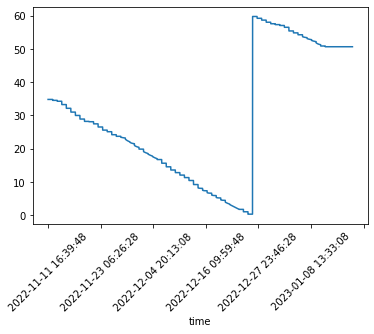

In [ ]:
arima_gw['predicted_mean_gw'].plot(rot=45)

#### **gw같은 경우 교체시점이 포함되어 있어 0의 값을 갖고 있다. 이런 데이터의 경우, mape의 값이 증가하게 되는데 우리는 값을 잘 예측하였는지만 알면 되기 때문에 0값을 포함하지 않는 부분을 따로 뽑아서 mape를 돌려서 확인해보려한다.**

기간을 임의로 여러번 바꿔주며 확인해보자! cross validation

대원님한테 물어보기

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(fanuc_chang_for_rmse, arima_gw_for_rmse)**0.5
RMSE
# 새로한 RMSE
## 0.406059 # PASS(대원님이 허락안해줌)

0.40605980007895276

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100 # MAPE

mape(y_test_rw, y_pred_rw)

# 0.12904152548196593

0.12904152548196593

In [ ]:
mape(fanuc_chang_for_rmse, arima_gw_for_rmse) # 실제값이 0이면 이럴 확률이 있다고 한다.

# inf
# 수정 후 3.79177287694157

3.791772876941578

In [ ]:
fanuc_chang_for_rmse

0          34.823378
1          34.823375
2          34.823372
3          34.823369
4          34.823366
             ...    
3795608     0.419757
3795609     0.419749
3795610     0.419741
3795611     0.419732
3795612     0.419724
Name: GW_WHEEL_REMAIN, Length: 3795613, dtype: float64

In [ ]:
arima_gw_for_rmse

0          34.823380
1          34.823380
2          34.823380
3          34.823380
4          34.823380
             ...    
3795608     1.088128
3795609     1.088128
3795610     1.088128
3795611     1.088128
3795612     1.088128
Name: predicted_mean_gw, Length: 3795613, dtype: float64

In [ ]:
#fanuc_chang_for_rmse = fanuc_chang_for_rmse.reset_index()
fanuc_chang_for_rmse = fanuc_chang_for_rmse['GW_WHEEL_REMAIN']

In [ ]:
fanuc_chang_for_rmse

0          34.823378
1          34.823375
2          34.823372
3          34.823369
4          34.823366
             ...    
3795608     0.419757
3795609     0.419749
3795610     0.419741
3795611     0.419732
3795612     0.419724
Name: GW_WHEEL_REMAIN, Length: 3795613, dtype: float64

In [ ]:
arima_gw_for_rmse

0          34.823380
1          34.823380
2          34.823380
3          34.823380
4          34.823380
             ...    
3795608     1.088128
3795609     1.088128
3795610     1.088128
3795611     1.088128
3795612     1.088128
Name: predicted_mean_gw, Length: 3795613, dtype: float64

# 참고용

In [ ]:
# 선형보간법
castdf = castdf.interpolate(method='linear')

#influxdb에 올릴 때 time set_index해서 올리기

castdf = pd.read_csv('cast_df.csv')